## Sonnet Dataset

In [ ]:
import re
import numpy as np
from collections import defaultdict
import random

def preprocess_text(raw_text):
    sonnets = raw_text.strip().split('\n')
    stopwords = set([
        'the', 'and', 'to', 'of', 'a', 'in', 'that', 'it', 'with', 'as', 'for', 'its',
        'on', 'is', 'are', 'be', 'by', 'this', 'was', 'or', 'an', 'from', 'at',
        'have', 'has', 'but', 'not', 'your', 'you', 'we', 'i', 'he', 'she', 'they', 'them', 'his', 'her'
    ])

    vocab = {}
    docs = []
    word_id = 0

    for line in sonnets:
        line = line.lower()
        line = re.sub(r'[^a-z\s]', '', line)
        words = [w for w in line.split() if len(w) > 2 and w not in stopwords]

        doc = []
        for word in words:
            if word not in vocab:
                vocab[word] = word_id
                word_id += 1
            doc.append(vocab[word])
        if doc:
            docs.append(doc)
    return docs, vocab

In [4]:
def initialize(docs, K, V, alpha=0.1, beta=0.01):
    D = len(docs)
    Z = []
    A = np.zeros((D, K)) + alpha
    B = np.zeros((K, V)) + beta
    BSUM = np.zeros(K) + beta * V

    for d, doc in enumerate(docs):
        current_doc_z = []
        for w in doc:
            z = random.randint(0, K - 1)
            current_doc_z.append(z)
            A[d][z] += 1
            B[z][w] += 1
            BSUM[z] += 1
        Z.append(current_doc_z)
    return Z, A, B, BSUM

def gibbs_sampling(docs, K, V, iterations=100):
    Z, A, B, BSUM = initialize(docs, K, V)
    for it in range(iterations):
        for d, doc in enumerate(docs):
            for i, w in enumerate(doc):
                z = Z[d][i]
                A[d][z] -= 1
                B[z][w] -= 1
                BSUM[z] -= 1
                p_z = A[d] * (B[:, w] / BSUM)
                p_z = p_z / p_z.sum()
                new_z = np.random.choice(K, p=p_z)
                Z[d][i] = new_z
                A[d][new_z] += 1
                B[new_z][w] += 1
                BSUM[new_z] += 1
                
    return A, B, Z


In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordclouds(B, vocab, num_topics=6, top_n=50):
    inv_vocab = {v: k for k, v in vocab.items()}
    for k in range(num_topics):
        word_freq = {inv_vocab[w]: B[k][w] for w in range(len(inv_vocab))}
        sorted_words = sorted(word_freq.items(), key=lambda x: -x[1])[:top_n]
        word_freq = dict(sorted_words)
        wc = WordCloud(width=600, height=400, background_color='white')
        wc.generate_from_frequencies(word_freq)
        plt.figure(figsize=(7, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Topic {k}", fontsize=14)
        plt.show()


['fairest creatures desire increase thereby beautys rose might never die riper time decease tender heir might bear memory thou contracted thine own bright eyes feedst thy lights flame selfsubstantial fuel making famine abundance lies thy self thy foe thy sweet self cruel thou art worlds fresh ornament herald gaudy spring thine own bud buriest thy content tender churl makst waste niggarding pity world else glutton eat worlds due grave thee', 'forty winters shall besiege thy brow dig deep trenches thy beautys field thy youths proud livery gazed tatterd weed small worth held asked thy beauty lies treasure thy lusty days say thine own deep sunken eyes alleating shame thriftless praise praise deservd thy beautys thou couldst answer fair child mine shall sum count make old excuse proving beauty succession thine new made thou art old thy blood warm thou feelst cold', 'look thy glass tell face thou viewest time face form another whose fresh repair thou renewest thou dost beguile world unbless 

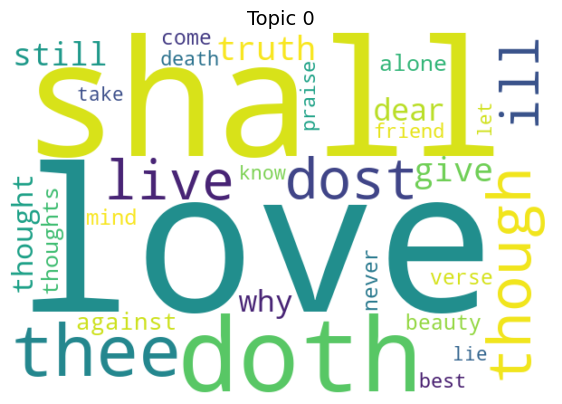

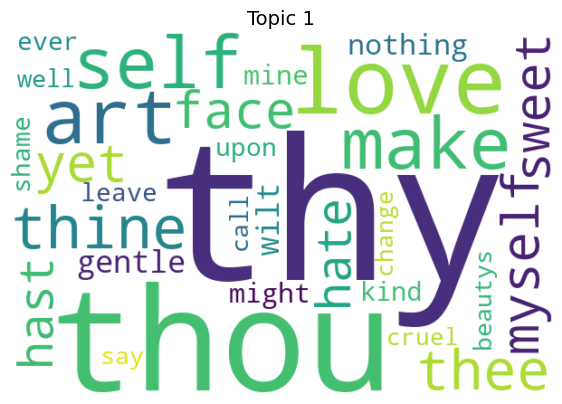

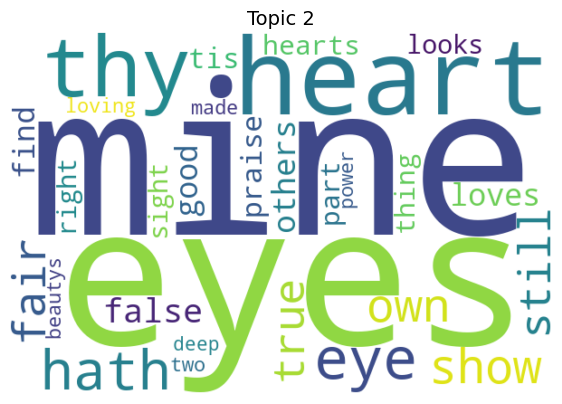

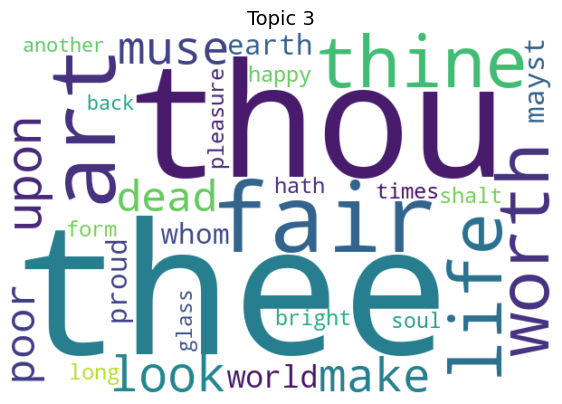

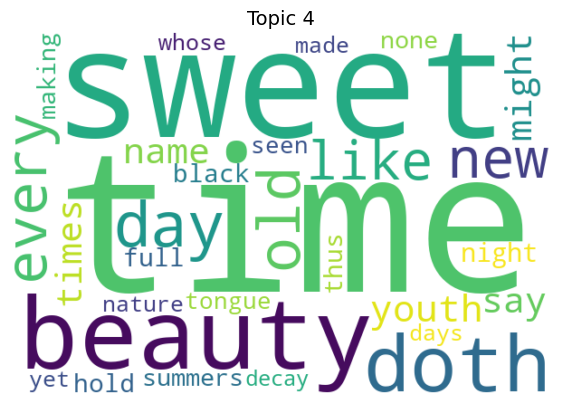

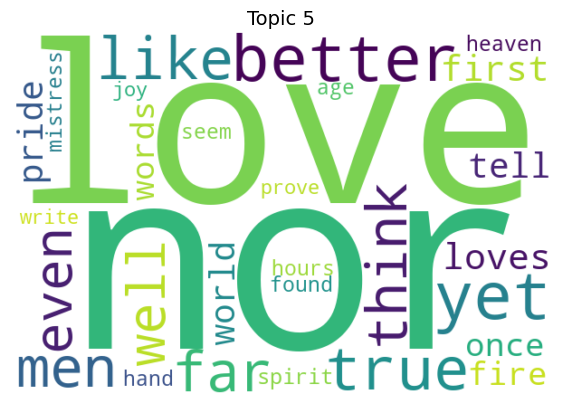

In [6]:
with open("sonnets.txt", "r") as f:
    raw_text = f.read()

docs, vocab = preprocess_text(raw_text)
V = len(vocab)
K = 6

A, B, Z = gibbs_sampling(docs, K, V, iterations=100)
display_wordclouds(B, vocab, num_topics=K, top_n=30)


## 20NG Dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['sci.space', 'rec.autos', 'comp.graphics', 'talk.politics.mideast']
dataset = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

raw_docs = dataset.data[:300]
labels = dataset.target[:300]
target_names = dataset.target_names


In [9]:
def preprocess_text_lines(lines):
    stopwords = set([
        'the', 'and', 'to', 'of', 'a', 'in', 'that', 'it', 'with', 'as', 'for', 'its',
        'on', 'is', 'are', 'be', 'by', 'this', 'was', 'or', 'an', 'from', 'at',
        'have', 'has', 'but', 'not', 'your', 'you', 'we', 'i', 'he', 'she', 'they', 'them', 'his', 'her'
    ])
    vocab = {}
    docs = []
    word_id = 0

    for line in lines:
        line = line.lower()
        line = re.sub(r'[^a-z\s]', '', line)
        words = [w for w in line.split() if len(w) > 2 and w not in stopwords]
        doc = []
        for word in words:
            if word not in vocab:
                vocab[word] = word_id
                word_id += 1
            doc.append(vocab[word])
        if doc:
            docs.append(doc)

    return docs, vocab


In [10]:
docs, vocab = preprocess_text_lines(raw_docs)
V = len(vocab)
K = 4

A, B, Z = gibbs_sampling(docs, K, V, iterations=100)


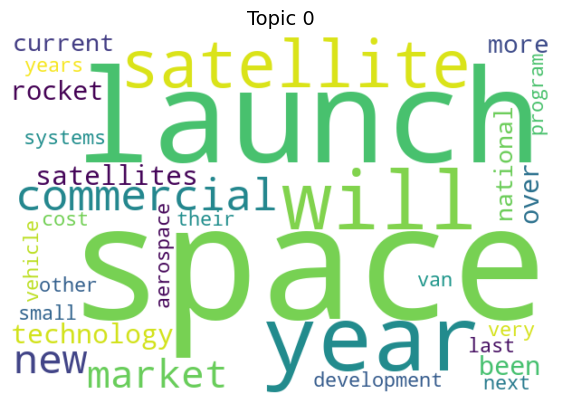

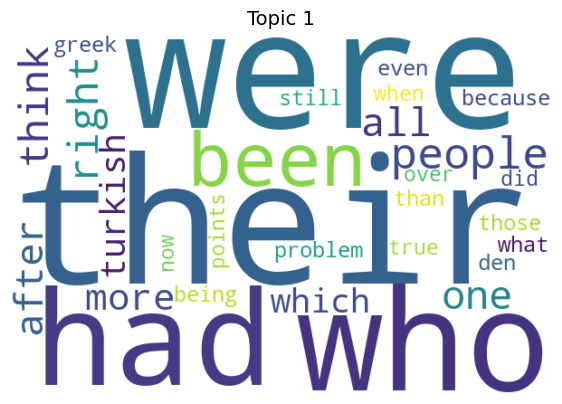

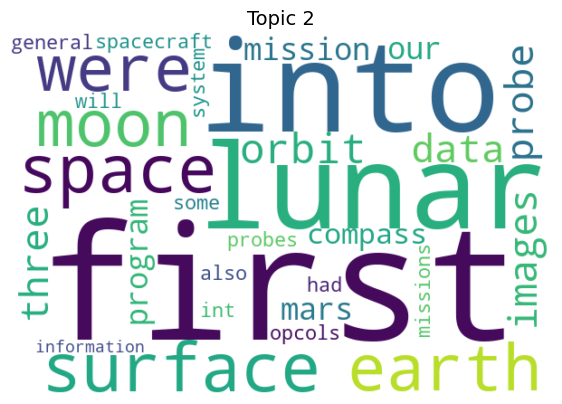

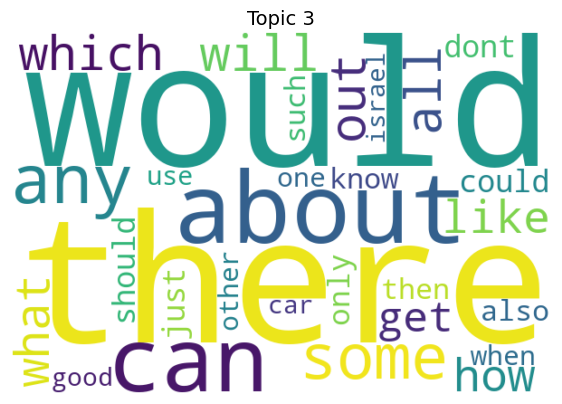

In [12]:
display_wordclouds(B, vocab, num_topics=K, top_n=30)
